In [1]:
import json, requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
etf_list = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']
etf_list2 = ['AAPL','CSCO','IBM','AMZN']
pickle_list = []
for etf in etf_list2:
    pickle_name = etf + '.pickle'
    pickle_list.append(pickle_name)
pickle_list

['AAPL.pickle', 'CSCO.pickle', 'IBM.pickle', 'AMZN.pickle']

In [10]:
df_list = []
for etf in pickle_list:
    df_name = 'df_' + etf[0:2]
    df_name = pd.read_pickle(etf)
    df_list.append(df_name)
print(df_list)

[      close       datetime      high       low     open    volume
0    154.45  1496725200000  155.8100  153.7800  153.900  26624926
1    155.37  1496811600000  155.9800  154.4800  155.020  21069647
2    154.99  1496898000000  155.5400  154.4000  155.250  21250798
3    148.98  1496984400000  155.1900  146.0200  155.190  64882657
4    145.42  1497243600000  146.0900  142.5100  145.740  72307330
5    146.59  1497330000000  147.4500  145.1500  147.160  34165445
6    145.16  1497416400000  147.5000  143.8400  147.500  31531232
7    144.29  1497502800000  144.4798  142.2100  143.320  32165373
8    142.27  1497589200000  144.5000  142.2000  143.780  50361093
9    146.34  1497848400000  146.7400  143.6600  143.660  32541404
10   145.01  1497934800000  146.8700  144.9400  146.870  24900073
11   145.87  1498021200000  146.0693  144.6100  145.520  21265751
12   145.63  1498107600000  146.7000  145.1199  145.770  19106294
13   146.28  1498194000000  147.1600  145.1100  145.130  35439389
14   145.

In [18]:
for df in df_list:
    df['Normed Return'] = df['close'] / df.iloc[0]['close']
    df['Allocation'] = df['Normed Return'] * (1/4)
    df['Pos'] = df['Allocation'] * 100000

In [19]:
pos_ls = []
for df in df_list:
    pos_ls.append(df['Pos'])
pos_ls

[0      25000.000000
 1      25148.915507
 2      25087.406928
 3      24114.600194
 4      23538.361929
 5      23727.743606
 6      23496.277112
 7      23355.454840
 8      23028.488184
 9      23687.277436
 10     23471.997410
 11     23611.201036
 12     23572.353512
 13     23677.565555
 14     23603.107802
 15     23264.810618
 16     23604.726449
 17     23256.717384
 18     23311.751376
 19     23227.581742
 20     23323.081904
 21     23102.945937
 22     23337.649725
 23     23480.090644
 24     23556.167044
 25     23590.158627
 26     23918.743930
 27     24124.312075
 28     24208.481709
 29     24292.651343
            ...     
 474    33227.581742
 475    33068.954354
 476    33119.132405
 477    32481.385562
 478    34075.752671
 479    33853.998058
 480    34274.846229
 481    33745.548721
 482    32835.869213
 483    32842.343801
 484    32489.478796
 485    31916.477825
 486    30061.508579
 487    30537.390741
 488    30903.204921
 489    30767.238589
 490    30592

In [20]:
portfolio_val = pd.concat(pos_ls, axis=1)

In [21]:
# portfolio_val.columns = ['vti pos', 'vea pos', 'vwo pos', 'vnq pos', 'xle pos', 'bnd pos', 'schp pos', 'vteb pos', 'vig pos']
portfolio_val.columns = ['aapl pos', 'csco pos', 'ibm pos', 'amzn pos']

In [22]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [23]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [24]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [25]:
ASR = (252**0.5) * SR
ASR

0.8803202120313177

In [27]:
close_ls = []
for df in df_list:
    close_ls.append(df['close'])
stocks = pd.concat(close_ls,axis=1)
stocks.columns = ['AAPL','CSCO','IBM','AMZN']

In [28]:
stocks.head()

,AAPL,CSCO,IBM,AMZN
0,154.45,31.56,152.37,1003.00
1,155.37,31.61,150.98,1010.07
2,154.99,31.61,152.10,1010.27
3,148.98,31.37,154.10,978.31
4,145.42,31.25,155.18,964.91


In [29]:
mean_daily_return = stocks.pct_change(1).mean()
mean_daily_return

AAPL    0.000504
CSCO    0.001213
IBM    -0.000184
AMZN    0.001306
dtype: float64

In [30]:
stocks.pct_change(1).corr()

,AAPL,CSCO,IBM,AMZN
AAPL,1.000000,0.590145,0.380326,0.621077
CSCO,0.590145,1.000000,0.523271,0.582318
IBM,0.380326,0.523271,1.000000,0.372391
AMZN,0.621077,0.582318,0.372391,1.000000


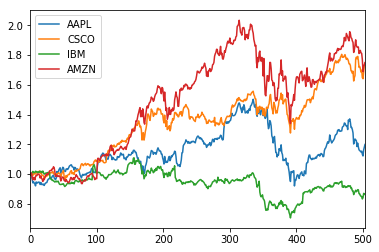

In [31]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [32]:
stock_daily_return = stocks.pct_change(1)
stock_daily_return.head()

,AAPL,CSCO,IBM,AMZN
0,NaN,NaN,NaN,NaN
1,0.005957,0.001584,-0.009123,0.007049
2,-0.002446,0.000000,0.007418,0.000198
3,-0.038777,-0.007593,0.013149,-0.031635
4,-0.023896,-0.003825,0.007008,-0.013697


In [33]:
log_ret = np.log(stocks/stocks.shift(1))
pickle_path = os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'data', 'log_ret.pickle'))
log_ret.to_pickle(pickle_path)
log_ret.head()

,AAPL,CSCO,IBM,AMZN
0,NaN,NaN,NaN,NaN
1,0.005939,0.001583,-0.009164,0.007024
2,-0.002449,0.000000,0.007391,0.000198
3,-0.039549,-0.007622,0.013064,-0.032146
4,-0.024186,-0.003833,0.006984,-0.013792


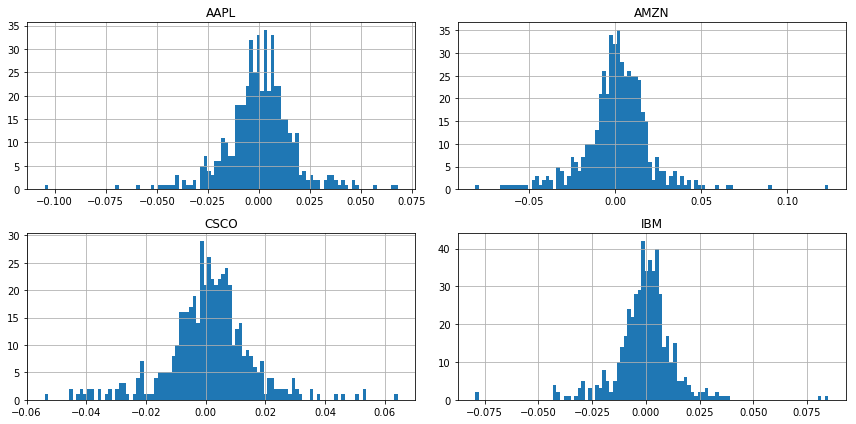

In [34]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [35]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,503.0,0.000361,0.016938,-0.104924,-0.007574,0.000676,0.008843,0.068053
CSCO,503.0,0.001108,0.014448,-0.053959,-0.005585,0.001582,0.007911,0.064431
IBM,503.0,-0.000282,0.014008,-0.079348,-0.006085,0.000494,0.005942,0.084934
AMZN,503.0,0.001112,0.019686,-0.081424,-0.006643,0.001525,0.011115,0.124131


In [36]:
log_ret.mean() * 252

AAPL    0.091018
CSCO    0.279184
IBM    -0.071063
AMZN    0.280110
dtype: float64

In [37]:
log_ret.cov() * 252

,AAPL,CSCO,IBM,AMZN
AAPL,0.072295,0.036496,0.022826,0.052131
CSCO,0.036496,0.052603,0.026778,0.041990
IBM,0.022826,0.026778,0.049448,0.026141
AMZN,0.052131,0.041990,0.026141,0.097660


In [40]:
num_ports = 1000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

[0.20638296 0.21056091 0.24995234 0.21802374 0.2086112  0.23738593
 0.2254708  0.21013591 0.20507745 0.22300587 0.19810799 0.21814179
 0.19699848 0.2164829  0.22847945 0.21311677 0.24022649 0.20514776
 0.20505287 0.19841358 0.22577063 0.20474964 0.20215203 0.22591663
 0.23687608 0.20682896 0.20089853 0.22692382 0.19927771 0.20657938
 0.20212471 0.21958423 0.20728767 0.2195086  0.20737426 0.2086573
 0.23960055 0.21167323 0.2021483  0.22606214 0.20573944 0.21171245
 0.21703786 0.22487449 0.22275156 0.20661455 0.20778658 0.21812994
 0.20162821 0.1970768  0.19953832 0.21368636 0.21635866 0.21727936
 0.22441091 0.19804168 0.20898157 0.21099225 0.19835564 0.19475693
 0.22279366 0.23132298 0.21873073 0.21758388 0.22779813 0.20389791
 0.2386633  0.19959815 0.22307915 0.232241   0.20870065 0.19696844
 0.26089    0.2003166  0.21030904 0.21567577 0.2098867  0.22681103
 0.21403408 0.23437402 0.19841337 0.22249333 0.20467751 0.20849663
 0.2181253  0.19808416 0.20098686 0.21226965 0.21773986 0.23257

In [41]:
m = sharpe_arr.argmax()
all_weights[m,:]
sharpe_arr.max()

1.1032742845775831

In [42]:
max_sr_ret = ret_arr[m]
max_sr_vol = vol_arr[m]

Text(0, 0.5, 'Return')

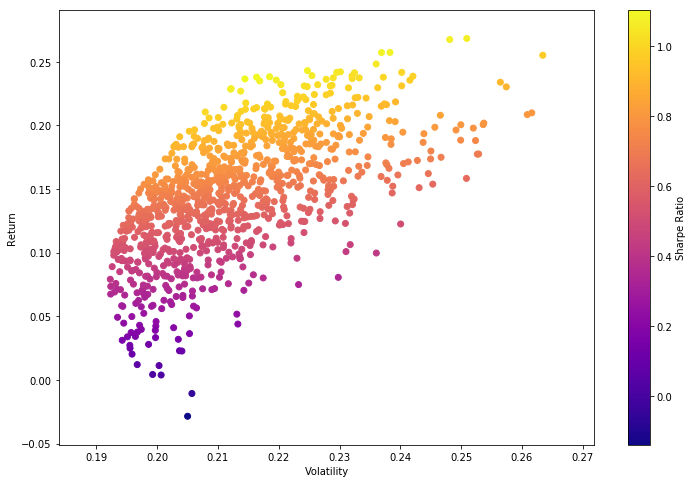

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
